<a href="https://colab.research.google.com/github/zzaeyun/ESAA23_1/blob/main/%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_516to528_544to561.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> p.516~528


## **07 문서 군집화 소개와 실습(Opinion Review 데이터 세트)**

###**문서 군집화 개념**
- 텍스트 구성의 문서를 군집화
- 동일한 군집에 속하는 문서를 같은 카테고리 소속으로 분류
- 텍스트 분류 기반의 문서 분류와 달리 문서 군집화는 비지도학습 기반

###**Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기**
- 51개의 텍스트 파일
- 호텔, 자동차, 전자제품 관련 사이트에서 가져온 리뷰 문서


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import glob, os

path=r'/content/drive/MyDrive/topics'
all_files=glob.glob(os.path.join(path, '*.data'))
filename_list=[]
opinion_text=[]

for file_ in all_files:
  df=pd.read_table(file_, index_col=None, header=0, encoding='latin1')

  filename_=file_.split('/')[-1]
  filename=filename_.split('.')[0]

  filename_list.append(filename)
  opinion_text.append(df.to_string())

document_df=pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,accuracy_garmin_nuvi_255W_gps,...
1,room_holiday_inn_london,...
2,service_holiday_inn_london,...
3,transmission_toyota_camry_2007,...
4,display_garmin_nuvi_255W_gps,...


- 파일 이름으로 어떤 제품/서비스에 대한 리뷰인지 확인 가능

<br>

- TF-IDF 형태로 피처 벡터화
- LemNormalize() 함수를 이용
  - n_gram: (1,2)
  - min_df, max_df로 피처의 개수 제한

In [9]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

# 단어 원형 추출 함수
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# 특수 문자 사전 생성: {33: None ...}
# ord(): 아스키 코드 생성
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
    # 텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)
    
    # 단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)
    
    # 단어 원형 추출
    return LemTokens(word_tokens)

In [14]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect=TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                           ngram_range=(1,2), min_df=0.05, max_df=0.85)

feature_vect=tfidf_vect.fit_transform(document_df['opinion_text'])

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


- 군집화 기법은 K-평균
- 문서 유형이 전자제품, 자동차, 호텔로 되어 있고 세부요소가 있음
- 먼저 5개의 중심(Centroid) 기반으로 군집화수행

In [16]:
from sklearn.cluster import KMeans

km_cluster=KMeans(n_clusters=5, max_iter=100000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label=km_cluster.labels_
cluster_centers=km_cluster.cluster_centers_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
document_df['cluster_label']=cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,3
1,room_holiday_inn_london,...,2
2,service_holiday_inn_london,...,2
3,transmission_toyota_camry_2007,...,4
4,display_garmin_nuvi_255W_gps,...,3


sort_values(by=정렬칼럼명)를 수행하면 인자로 입력된 칼럼명으로 데이터 정렬

In [18]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
37,buttons_amazon_kindle,...,0
42,eyesight-issues_amazon_kindle,...,0
10,fonts_amazon_kindle,...,0
38,navigation_amazon_kindle,...,0
34,price_amazon_kindle,...,0


In [19]:
#전자 제품
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
36,battery-life_amazon_kindle,...,1
48,battery-life_ipod_nano_8gb,...,1
41,battery-life_netbook_1005ha,...,1
45,features_windows7,...,1
47,keyboard_netbook_1005ha,...,1
21,performance_netbook_1005ha,...,1
31,screen_garmin_nuvi_255W_gps,...,1
50,screen_ipod_nano_8gb,...,1
6,screen_netbook_1005ha,...,1
22,size_asus_netbook_1005ha,...,1


In [20]:
#호텔
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
25,bathroom_bestwestern_hotel_sfo,...,2
26,food_holiday_inn_london,...,2
16,food_swissotel_chicago,...,2
23,free_bestwestern_hotel_sfo,...,2
8,location_bestwestern_hotel_sfo,...,2
19,location_holiday_inn_london,...,2
27,parking_bestwestern_hotel_sfo,...,2
12,price_holiday_inn_london,...,2
1,room_holiday_inn_london,...,2
14,rooms_bestwestern_hotel_sfo,...,2


In [21]:
#도요타 혼다: 자동차
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
35,comfort_honda_accord_2008,...,4
18,comfort_toyota_camry_2007,...,4
17,gas_mileage_toyota_camry_2007,...,4
43,interior_honda_accord_2008,...,4
5,interior_toyota_camry_2007,...,4
7,mileage_honda_accord_2008,...,4
32,performance_honda_accord_2008,...,4
9,quality_toyota_camry_2007,...,4
40,seats_honda_accord_2008,...,4
3,transmission_toyota_camry_2007,...,4


- 3개의 그룹으로 군집화

In [23]:
km_cluster=KMeans(n_clusters=3, max_iter=100000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label=km_cluster.labels_
cluster_centers=km_cluster.cluster_centers_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
document_df['cluster_label']=cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,0
49,satellite_garmin_nuvi_255W_gps,...,0
30,directions_garmin_nuvi_255W_gps,...,0
31,screen_garmin_nuvi_255W_gps,...,0
33,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,0
34,price_amazon_kindle,...,0
36,battery-life_amazon_kindle,...,0
37,buttons_amazon_kindle,...,0
22,size_asus_netbook_1005ha,...,0
38,navigation_amazon_kindle,...,0


###**군집별 핵심 단어 추출하기**

- 각 군집을 구성하는 핵심 단어 확인
- KMeans 객체의 clusters_centers_: 각 군집을 구성하는 단어 피처가 군집의 중심을 기준으로 얼마나 가깝게 위치해 있는지 
  - 행은 개별 군집
  - 열을 개별 피처
  - 값은 개별 군집 내의 상대 위치를 숫자 값으로 나타낸 일종의 좌표

In [25]:
cluster_centers=km_cluster.cluster_centers_
print('cluster centers shape: ', cluster_centers.shape)
print(cluster_centers)

cluster centers shape:  (3, 4611)
[[0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]]


군집이 3개 word 피처가 4611개
- 1에 가까울수록 중심과 가까운 값

In [26]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명들을 반환함. 
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화. 
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함 
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
        
    return cluster_details

get_cluster_details()를 호출하면 dictionary를 원소로 가지는 리스트인 cluster_details를 반환

In [27]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명 :',cluster_detail['filenames'][:7])
        print('==================================================')

In [29]:
feature_names=tfidf_vect.get_feature_names_out()

cluster_details=get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,
                                    feature_names=feature_names, clusters_num=3, top_n_features=10)
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명 : ['accuracy_garmin_nuvi_255W_gps', 'display_garmin_nuvi_255W_gps', 'screen_netbook_1005ha', 'fonts_amazon_kindle', 'updates_garmin_nuvi_255W_gps', 'speed_garmin_nuvi_255W_gps', 'performance_netbook_1005ha']
####### Cluster 1
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명 : ['room_holiday_inn_london', 'service_holiday_inn_london', 'location_bestwestern_hotel_sfo', 'staff_swissotel_chicago', 'price_holiday_inn_london', 'rooms_bestwestern_hotel_sfo', 'food_swissotel_chicago']
####### Cluster 2
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명 : ['transmission_toyota_camry_2007', 'interior_toyota_camry_2007', 'mileage_honda_accord_2008', 'quality_toyota_camry_2007', 'gas_



> p.544~561

## **10 텍스트 분석 실습 - 캐글 Mercari Price Suggestion Challenge**

- train_id: 데이터 id
- name: 제품명
- item_condition_id: 판매자가 제공하는 제품 상태
- category_name: 카테고리 명
- brand_name: 브랜드 이름
- price: 제품 가격, 예측을 위한 타깃 속성
- shipping: 배송지 무료 여부, 1이면 무료, 0이면 유료
- item_description: 제품에 대한 설명

<br>

회귀로 피처를 학습한 뒤 price를 예측하는 문제

<br>

###**데이터 전처리**


In [1]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

mercari_df=pd.read_csv('/train.tsv', sep='\t')
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


In [2]:
print(mercari_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None


- brand_name 칼럼은 매우 많은 Null 값을 가짐
- category_name은 6300건의 null 데이터

<br>

- price 칼럼의 데이터 분포도 살펴보기

<ipython-input-3-72074963b582>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_df, kde=False)


<Axes: xlabel='price'>

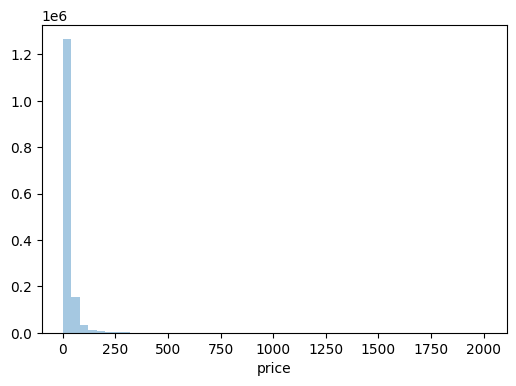

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_df=mercari_df['price']
plt.figure(figsize=(6,4))
sns.distplot(y_train_df, kde=False)

- price 값이 비교적 적은 가격을 가진 데이터 값에 왜곡돼 분포
- 로그 값으로 변환한 뒤 분포도를 살펴보기

<ipython-input-4-b9b62dbb1352>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_df, kde=False)


<Axes: xlabel='price'>

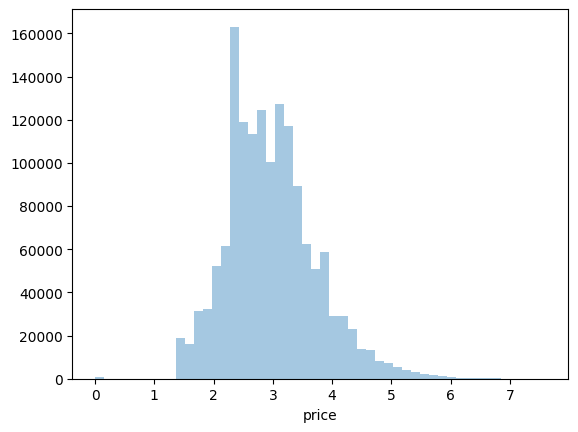

In [4]:
import numpy as np

y_train_df=np.log1p(y_train_df)
sns.distplot(y_train_df, kde=False)

- 로그 값으로 변환하면 price 값이 비교적 정규 분포에 가까움

In [5]:
mercari_df['price']=np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

In [6]:
print('Shipping 값 유형:\n', mercari_df['shipping'].value_counts())
print('item_condition_id 값 유형:\n', mercari_df['item_condition_id'].value_counts())

Shipping 값 유형:
 0    819435
1    663100
Name: shipping, dtype: int64
item_condition_id 값 유형:
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


- Shipping 칼럼은 배송비 유무이며, 값이 비교적 균일

<br>

- item_description 칼럼은 Null 값은 별로 없지만, description에 대한 별도 설명이 없는 경우 Mo description yet' 값으로 되어 있음

In [7]:
boolean_cond=mercari_df['item_description']=='No description yet'
mercari_df[boolean_cond]['item_description'].count()

82489

- item_description의 Null 값이 매우 많으므로 적절한 값으로 변경 

<br>

- category_name은 '/'로 분리된 카테고리를 하나의 문자열로 나타냄
  - / 를 기준으로 단어를 토큰화해 각각 별도의 피처로 저장
  - Null일 경우는 모두 'Other Null'

- brand_name, category_name, item_description 칼럼의 Null 값은 일괄적으로 'Other Null'로 변경

In [8]:
def split_cat(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Other_Null' , 'Other_Null' , 'Other_Null']

# 위의 split_cat( )을 apply lambda에서 호출하여 대,중,소 컬럼을 mercari_df에 생성. 
mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so'] = \
                        zip(*mercari_df['category_name'].apply(lambda x : split_cat(x)))

# 대분류만 값의 유형과 건수를 살펴보고, 중분류, 소분류는 값의 유형이 많으므로 분류 갯수만 추출
print('대분류 유형 :\n', mercari_df['cat_dae'].value_counts())
print('중분류 갯수 :', mercari_df['cat_jung'].nunique())
print('소분류 갯수 :', mercari_df['cat_so'].nunique())

대분류 유형 :
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_dae, dtype: int64
중분류 갯수 : 114
소분류 갯수 : 871


In [9]:
mercari_df['brand_name']=mercari_df['brand_name'].fillna(value='Other_Null')
mercari_df['category_name']=mercari_df['category_name'].fillna(value='Other_Null')
mercari_df['item_description']=mercari_df['item_description'].fillna(value='Other_Null')

In [10]:
mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

###**피처 인코딩과 피처 벡터화**

- Mercari Price Suggestion에 이용되는 데이터 세트는 문자열 칼럼이 많음
- 상품 가격을 예측해야 하므로 회귀 모델을 기반으로 해야 함
  - 선형 회귀의 경우 원-핫 인코딩 적용이 훨씬 선호 됨
- 피처 백터화의 경우는 비교적 짧은 텍스트의 경우는 Count 기반, 긴 텍스트는 TD-IDF 기반의 벡터화 적용

<br>

- **brand_name**: 상품의 브랜드명

In [11]:
print('brand name의 유형 건수 :', mercari_df['brand_name'].unique())
print('brand name sample 5건 : \n', mercari_df['brand_name'].value_counts()[:5])

brand name의 유형 건수 : ['Other_Null' 'Razer' 'Target' ... 'Astroglide' 'Cumberland Bay'
 'Kids Only']
brand name sample 5건 : 
 Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64


- brand_name의 경우 대부분 명료한 문자열로 되어 있으므로 원-핫 인코딩으로 변환

<br>

- **name**: 상품명

In [12]:
print('name의 유형 건수 :', mercari_df['name'].unique())
print('name sample 10건 : \n', mercari_df['name'].value_counts()[:10])

name의 유형 건수 : ['MLB Cincinnati Reds T Shirt Size XL' 'Razer BlackWidow Chroma Keyboard'
 'AVA-VIV Blouse' ... '21 day fix containers and eating plan'
 'World markets lanterns' 'Brand new lux de ville wallet']
name sample 10건 : 
 Bundle                 2232
Reserved                453
Converse                445
BUNDLE                  418
Dress                   410
Coach purse             404
Lularoe TC leggings     396
Romper                  353
Nike                    340
Vans                    334
Name: name, dtype: int64


name 속성의 경우 종류가 매우 많으며 고유한 상품명을 가지고 있으므로 Count 기반으로 피처 벡터화 변환

<br>

- category_name: 세 개의 칼럼으로 분리한 후 원-핫 인코딩
- shipping 칼럼은 배송비 무료 여부, item_condition_id는 상품 상태로서 다섯 가지 유형의 값: 모두 원-핫 인코딩
- item_description: 가장 긴 텍스트

In [13]:
pd.set_option('max_colwidth', 200)

# item_description의 평균 문자열 개수
print('item_description 평균 문자열 개수:',mercari_df['item_description'].str.len().mean())

mercari_df['item_description'][:2]

item_description 평균 문자열 개수: 145.7113889385411


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

평균 문자열이 145자로 비교적 크므로 해당 칼럼은 TF-IDF로 변환
- name과 item_description 칼럼을 피처 벡터화
- name: CountVectorizer
- item_description: TfidfVectorizer로 변환


In [14]:
cnt_vec=CountVectorizer()
X_name=cnt_vec.fit_transform(mercari_df.name)

tfidf_descp=TfidfVectorizer(max_features=50000, ngram_range=(1,3), stop_words='english')
X_descp=tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape:', X_name.shape)
print('item_description vectorization shape:', X_descp.shape)

name vectorization shape: (1482535, 105757)
item_description vectorization shape: (1482535, 50000)


CountVectorizer, TfidfVectorizer가 fit_transform으로 반환하는 데이터는 희소 행렬 형태
- 희소 행렬 객체 변수인 X_name, X_descp를 결합해 새로운 데이터 세트로 구성하고 다른 변수들도 ML 모델을 실행하는 기반 데이터 세트로 재구성 되어야 함


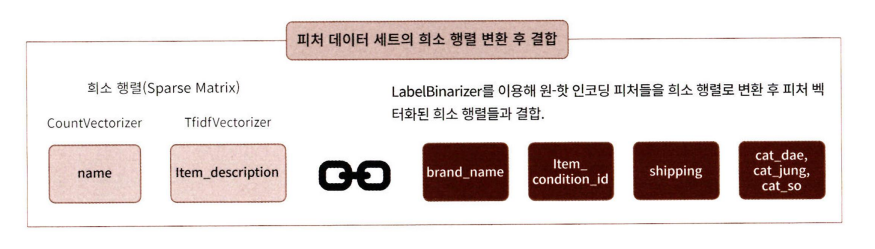

- 모든 인코딩 대상 칼럼은 LabelBinarizer를 이용해 희소 행렬 형태의 원-핫 인코딩
- 개별 칼럼으로 만들어진 희소 행렬은 사이파이 패키지 sparse 모듈의 hstack( ) 함수를 이용해 결합

In [15]:
from sklearn.preprocessing import LabelBinarizer

# brand_name, item_condition_id, shipping 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_brand_name= LabelBinarizer(sparse_output=True)
X_brand = lb_brand_name.fit_transform(mercari_df['brand_name'])

lb_item_cond_id = LabelBinarizer(sparse_output=True)
X_item_cond_id = lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])

lb_shipping= LabelBinarizer(sparse_output=True)
X_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

# cat_dae, cat_jung, cat_so 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_cat_dae = LabelBinarizer(sparse_output=True)
X_cat_dae= lb_cat_dae.fit_transform(mercari_df['cat_dae'])

lb_cat_jung = LabelBinarizer(sparse_output=True)
X_cat_jung = lb_cat_jung.fit_transform(mercari_df['cat_jung'])

lb_cat_so = LabelBinarizer(sparse_output=True)
X_cat_so = lb_cat_so.fit_transform(mercari_df['cat_so'])
     

In [16]:
print(type(X_brand), type(X_item_cond_id), type(X_shipping))
print('X_brand_shape:{0}, X_item_cond_id shape:{1}'.format(X_brand.shape, X_item_cond_id.shape))
print('X_shipping shape:{0}, X_cat_dae shape:{1}'.format(X_shipping.shape, X_cat_dae.shape))
print('X_cat_jung shape:{0}, X_cat_so shape:{1}'.format(X_cat_jung.shape, X_cat_so.shape))

<class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'>
X_brand_shape:(1482535, 4810), X_item_cond_id shape:(1482535, 5)
X_shipping shape:(1482535, 1), X_cat_dae shape:(1482535, 11)
X_cat_jung shape:(1482535, 114), X_cat_so shape:(1482535, 871)


- 인코딩 변환된 데이터 세트가 CSR 형태로 변환된 csr_matrix 타입

<br>

- hstack()을 이용해 모두 결합

In [17]:
from scipy.sparse import hstack
import gc

sparse_matrix_list=(X_name, X_descp, X_brand, X_item_cond_id,
                    X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

X_features_sparse=hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)

del X_features_sparse
gc.collect()

<class 'scipy.sparse._csr.csr_matrix'> (1482535, 161569)


0

###**릿지 회귀 모델 구축 및 평가**

- 어려 알고리즘 모델과 희소 행렬을 변환하고 예측 성능을 비교하면서 테스트를 수행할 것이므로 수행에 필요한 로직을 함수화
- 평가 지표: RMSLE

In [18]:
def rmsle(y , y_pred):
    # underflow, overflow를 막기 위해 log가 아닌 log1p로 rmsle 계산 
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_org_price(y_test , preds): 
    
    # 원본 데이터는 log1p로 변환되었으므로 exmpm1으로 원복 필요. 
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)
    
    # rmsle로 RMSLE 값 추출
    rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
    return rmsle_result

평가 데이터 세트는 train_test_split()을 이용해 전체 데이터의 20%

In [19]:
import gc 
from  scipy.sparse import hstack

def model_train_predict(model,matrix_list):
    # scipy.sparse 모듈의 hstack 을 이용하여 sparse matrix 결합
    X= hstack(matrix_list).tocsr()     
    
    X_train, X_test, y_train, y_test=train_test_split(X, mercari_df['price'], 
                                                      test_size=0.2, random_state=156)
    
    # 모델 학습 및 예측
    model.fit(X_train , y_train)
    preds = model.predict(X_test)
    
    del X , X_train , X_test , y_train 
    gc.collect()
    
    return preds , y_test

- Ridge를 이용해 회귀 예측 수행

In [20]:
linear_model = Ridge(solver = "lsqr", fit_intercept=False)

sparse_matrix_list = (X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds , y_test = model_train_predict(model=linear_model ,matrix_list=sparse_matrix_list)
print('Item Description을 제외했을 때 rmsle 값:', evaluate_org_price(y_test , linear_preds))

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds , y_test = model_train_predict(model=linear_model , matrix_list=sparse_matrix_list)
print('Item Description을 포함한 rmsle 값:',  evaluate_org_price(y_test ,linear_preds))

Item Description을 제외했을 때 rmsle 값: 0.4983990938999374
Item Description을 포함한 rmsle 값: 0.4680329023962086


Item Description 영향이 중요함

<br>

###**LightGBM 회귀 모델 구축과 앙상블을 이용한 최종 예측 평가**


In [ ]:
from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_preds , y_test = model_train_predict(model = lgbm_model , matrix_list=sparse_matrix_list)
print('LightGBM rmsle 값:',  evaluate_org_price(y_test , lgbm_preds))

In [ ]:
preds = lgbm_preds * 0.45 + linear_preds * 0.55
print('LightGBM과 Ridge를 ensemble한 최종 rmsle 값:',  evaluate_org_price(y_test , preds))

##**11 정리**

- 텍스트 분석을 위한 기반 프로세스를 알아보고 이를 통해 텍스트 분류, 감정 분석, 토픽 모델링, 텍스트 군집화 및 유사도 측정 등을 직접 파이썬 코드를 이용해 구현

**머신러닝 기반의 텍스트 분석 프로세스**
1. 텍스트 사전 정제 작업 등의 텍스트 정규화
2. 단어들을 피처 벡터화로 변환
3. 피처 벡터 데이터 세트에 머신러닝 모델 학습 및 예측, 평가

<br>

감성 분석
- 긍정/부정 이진 분류 적용
- 감성 사전 Lexicon 이용

<br>

- K-평균 군집화
- 코사인 유사도를 이용해 텍스트 유사도 측정
- KoNLPy 패키지: 한글 형태소 분석기